In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
all_data = pd.read_csv('all_data.csv', index_col=0)
PM25 = pd.read_csv('PM25.csv', index_col=0)
model_data = all_data = pd.concat([all_data, PM25], axis=1)
model_data = model_data.rename(columns={model_data.columns[-1]: "PM2.5"})
model_data = model_data.dropna(subset=["PM2.5"])
model_data

X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002,random_state=42)

In [5]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def objective(trial):
    X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
    y = model_data["PM2.5"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)

    alpha = trial.suggest_float('alpha', 0.01, 1.0)

    model = Lasso(alpha=alpha,random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    return r2

study = optuna.create_study(direction='maximize')

improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-10-22 18:26:43,143] A new study created in memory with name: no-name-0d177185-fe8f-4ab6-aa8c-e77eead6171d
[I 2023-10-22 18:26:43,172] Trial 0 finished with value: 0.8250869714132897 and parameters: {'alpha': 0.6135299189915951}. Best is trial 0 with value: 0.8250869714132897.
[I 2023-10-22 18:26:43,183] Trial 1 finished with value: 0.8206192908610384 and parameters: {'alpha': 0.03395192500523218}. Best is trial 0 with value: 0.8250869714132897.
[I 2023-10-22 18:26:43,194] Trial 2 finished with value: 0.8251466590232721 and parameters: {'alpha': 0.648952685798143}. Best is trial 2 with value: 0.8251466590232721.
[I 2023-10-22 18:26:43,204] Trial 3 finished with value: 0.8251244549888176 and parameters: {'alpha': 0.8008991152455049}. Best is trial 2 with value: 0.8251466590232721.
[I 2023-10-22 18:26:43,214] Trial 4 finished with value: 0.8242601300407914 and parameters: {'alpha': 0.408572652543515}. Best is trial 2 with value: 0.8251466590232721.
[I 2023-10-22 18:26:43,225] Tria

Najlepsze parametry: {'alpha': 0.7174559632832732}
Najlepszy R^2 Score: 0.8251925116702771


Średni błąd kwadratowy (MSE): 110.12416195052958
Procentowa zgodność: 82.52%


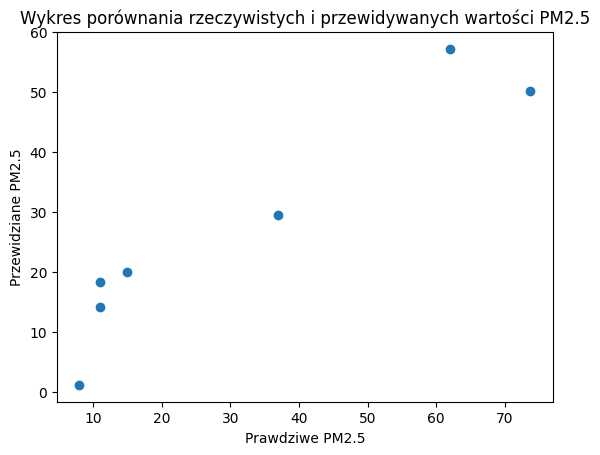

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
194,11.00,18.322534,-7.322534
2194,10.98,14.185961,-3.205961
3276,73.73,50.126159,23.603841
199,15.00,19.918561,-4.918561
1091,8.00,1.138163,6.861837
80,37.00,29.555991,7.444009
2602,62.02,57.209616,4.810384


In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


params =  {'alpha': 0.7174559632832732}
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine"]]
y = model_data["PM2.5"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.002, random_state=42)


model = Lasso(**params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

plt.scatter(y_test, y_pred)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



